# Classification of galaxy


In [ ]:
!pip install Augmentor    

In [ ]:
from string import Template
from zipfile import ZipFile
from os import path, mkdir
import pandas as pd
from shutil import copy, rmtree
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import Augmentor
from tqdm.autonotebook import tqdm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Final Year Project/Galaxy Classification/Galaxy morphology classification.zip" -d "/content"

Archive:  /content/drive/MyDrive/Final Year Project/Galaxy Classification/Galaxy morphology classification.zip
  inflating: /content/all_ones_benchmark.zip  
  inflating: /content/all_zeros_benchmark.zip  
  inflating: /content/central_pixel_benchmark.zip  
  inflating: /content/images_test_rev1.zip  
  inflating: /content/images_training_rev1.zip  
  inflating: /content/training_solutions_rev1.zip  


In [ ]:
!unzip "/content/images_training_rev1.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_training_rev1/926425.jpg  
  inflating: /content/images_training_rev1/926426.jpg  
  inflating: /content/images_training_rev1/926435.jpg  
  inflating: /content/images_training_rev1/926446.jpg  
  inflating: /content/images_training_rev1/926448.jpg  
  inflating: /content/images_training_rev1/926453.jpg  
  inflating: /content/images_training_rev1/926462.jpg  
  inflating: /content/images_training_rev1/926478.jpg  
  inflating: /content/images_training_rev1/926480.jpg  
  inflating: /content/images_training_rev1/926484.jpg  
  inflating: /content/images_training_rev1/926488.jpg  
  inflating: /content/images_training_rev1/926509.jpg  
  inflating: /content/images_training_rev1/926522.jpg  
  inflating: /content/images_training_rev1/926544.jpg  
  inflating: /content/images_training_rev1/926547.jpg  
  inflating: /content/images_training_rev1/926548.jpg  
  inflating: /content/images_training_rev1/926551.jpg

In [ ]:
read_probaby = pd.read_csv('/content/training_solutions_rev1.zip')

read_probaby['GalaxyID'] = read_probaby['GalaxyID'].astype(str)

columns_mapper = {
    'GalaxyID': 'GalaxyID',
    'Class7.1': 'completely_round',
    'Class7.2': 'in_between',
    'Class7.3': 'cigar_shaped',
    'Class2.1': 'on_edge',
    'Class4.1': 'has_signs_of_spiral',
    'Class3.1': 'spiral_barred',
    'Class3.2': 'spiral',
    'Class1.1': 'Early type',
    'Class1.3': 'Artifact'
}
columns = list(columns_mapper.values())
training_df = read_probaby.rename(columns=columns_mapper)[columns]
training_df.set_index('GalaxyID', inplace=True)
training_df.head(10)

,completely_round,in_between,cigar_shaped,on_edge,has_signs_of_spiral,spiral_barred,spiral,Early type,Artifact
GalaxyID,,,,,,,,,
100008,0.201463,0.181684,0.000000,0.000000,0.418398,0.038452,0.578401,0.383147,0.000000
100023,0.000000,0.135082,0.191919,0.031178,0.591328,0.467370,0.165229,0.327001,0.009222
100053,0.000000,0.741864,0.023853,0.000000,0.000000,0.000000,0.177352,0.765717,0.056931
100078,0.408599,0.284778,0.000000,0.000000,0.189098,0.109493,0.129071,0.693377,0.068059
100090,0.494587,0.439252,0.000000,0.000000,0.000000,0.000000,0.000000,0.933839,0.066161
100122,0.066807,0.663691,0.008335,0.000000,0.000000,0.000000,0.238159,0.738832,0.023009
100123,0.388158,0.074334,0.000000,0.000000,0.000000,0.000000,0.456033,0.462492,0.081475
100128,0.482483,0.205300,0.000000,0.000000,0.000000,0.069098,0.219246,0.687783,0.023873
100134,0.010917,0.010917,0.000000,0.021751,0.546491,0.313077,0.642124,0.021834,0.001214


In [ ]:
def plot_distribution(df, column):
    plt.plot(list(df[column]))
    plt.title('Distribution of data')
    plt.ylabel('% Votes')
    plt.legend([column], loc='upper left')
    plt.show()

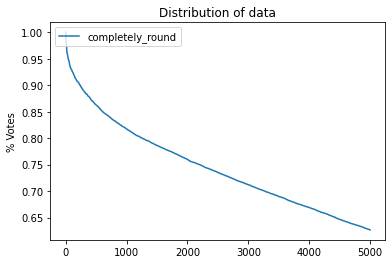

In [ ]:
completely_round_df = training_df.sort_values(by = 'completely_round', ascending= False)[0:5000]
completely_round_df['type'] = 'completely_round'
completely_round_df = completely_round_df[['type', 'completely_round']]
plot_distribution(completely_round_df, 'completely_round')

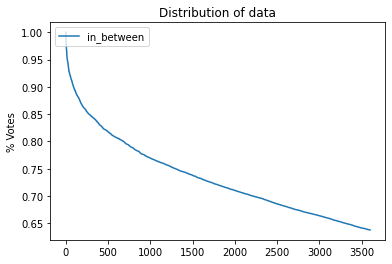

In [ ]:
in_between_df = training_df.sort_values(by = 'in_between', ascending= False)[0:3600]
in_between_df['type'] = 'in_between'

# filters
bigger_than_completely_round = in_between_df['in_between'] > in_between_df['completely_round']
bigger_than_cigar_shaped = in_between_df['in_between'] > in_between_df['cigar_shaped']

in_between_df = in_between_df[bigger_than_completely_round & bigger_than_cigar_shaped]
in_between_df = in_between_df[['type', 'in_between']]
plot_distribution(in_between_df, 'in_between')

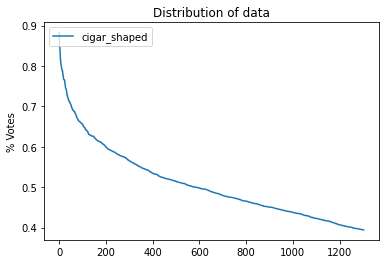

In [ ]:
cigar_shaped_df = training_df.sort_values(by = 'cigar_shaped', ascending= False)[0:1550]
cigar_shaped_df['type'] = 'cigar_shaped'

# filters
bigger_than_in_between = cigar_shaped_df['cigar_shaped'] > cigar_shaped_df['in_between']
bigger_than_on_edge = cigar_shaped_df['cigar_shaped'] > cigar_shaped_df['on_edge']

cigar_shaped_df = cigar_shaped_df[bigger_than_in_between & bigger_than_on_edge]
cigar_shaped_df = cigar_shaped_df[['type', 'cigar_shaped']]
plot_distribution(cigar_shaped_df, 'cigar_shaped')

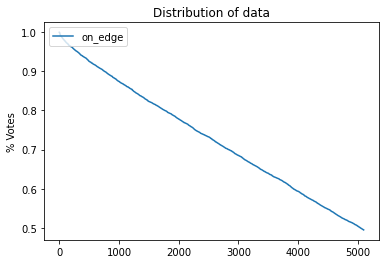

In [ ]:
on_edge_df = training_df.sort_values(by = 'on_edge', ascending= False)[0:5100]
on_edge_df['type'] = 'on_edge'
on_edge_df = on_edge_df[['type', 'on_edge']]
plot_distribution(on_edge_df, 'on_edge')

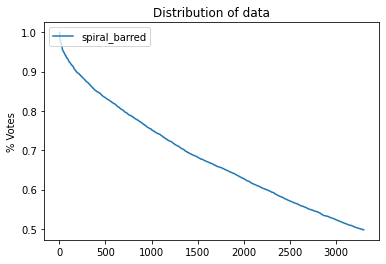

In [ ]:
spiral_barred_df = training_df.sort_values(by = ['spiral_barred', 'has_signs_of_spiral'], ascending= False)[0:3300]
spiral_barred_df['type'] = 'spiral_barred'
spiral_barred_df = spiral_barred_df[['type', 'spiral_barred']]
plot_distribution(spiral_barred_df, 'spiral_barred')

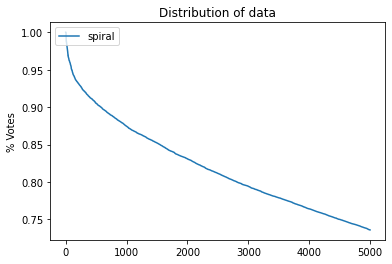

In [ ]:
spiral_df = training_df.sort_values(by = ['spiral', 'has_signs_of_spiral'], ascending= False)[0:5000]
spiral_df['type'] = 'spiral'
spiral_df = spiral_df[['type', 'spiral']]
plot_distribution(spiral_df, 'spiral')

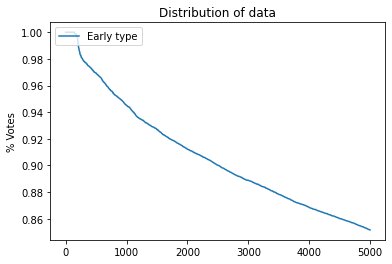

In [ ]:
Early_type_df = training_df.sort_values(by = 'Early type', ascending= False)[0:5000]
Early_type_df['type'] = 'Early type'
Early_type_df = Early_type_df[['type', 'Early type']]
plot_distribution(Early_type_df, 'Early type')

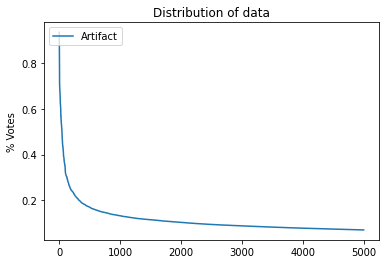

In [ ]:
Artifact_df = training_df.sort_values(by = 'Artifact', ascending= False)[0:5000]
Artifact_df['type'] = 'Artifact'
Artifact_df = Artifact_df[['type', 'Artifact']]
plot_distribution(Artifact_df, 'Artifact')

In [ ]:
dfs = [
    completely_round_df,
    in_between_df,
    cigar_shaped_df,
    on_edge_df,
    spiral_barred_df,
    spiral_df,
    Early_type_df,
    Artifact_df
]


# Merge and drop and possible duplicates
merged_dfs = pd.concat(dfs, sort=False)
merged_dfs.reset_index(inplace = True)
merged_dfs.drop_duplicates(subset='GalaxyID', inplace = True)


train_merged_df, test_merged_df = train_test_split(merged_dfs, test_size=0.2)

In [ ]:
train_merged_df.shape

(22560, 10)

In [ ]:
test_merged_df.shape

(5641, 10)

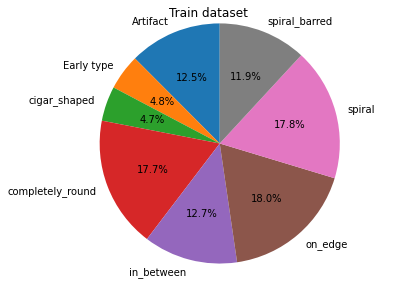

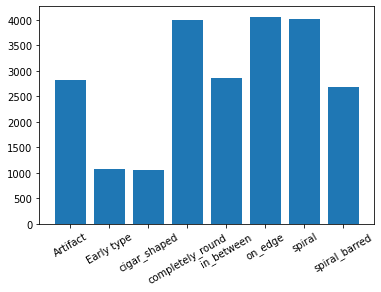

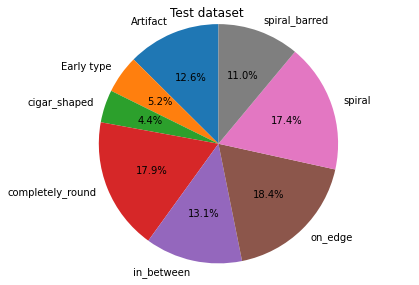

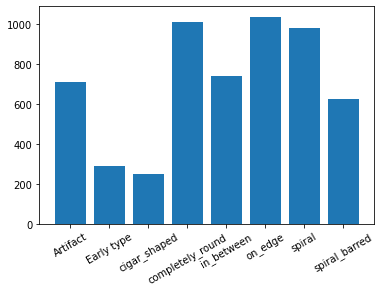

In [ ]:
def plot_info_set(df, name):
    countings = df.groupby('type').count().to_dict()['GalaxyID']
    labels = list(countings.keys())
    values = list(countings.values())

    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    fig1.suptitle(name)
    plt.tight_layout()
    plt.show()

    index = np.arange(len(labels))

    plt.bar(index, values)

    plt.xticks(index, labels, rotation=30)
    plt.show()

plot_info_set(train_merged_df, 'Train dataset')
plot_info_set(test_merged_df, 'Test dataset')


In [ ]:
rmtree('/training', ignore_errors=True)
rmtree('/training_dataset', ignore_errors=True)
rmtree('/test', ignore_errors=True)
rmtree('/test_dataset', ignore_errors=True)

In [ ]:
def copy_files_of_set(df, dest_folder):
    pbar = tqdm(total=df.shape[0], desc="Copying images", unit=" Images")
    if path.isdir(dest_folder) is False:
        mkdir(dest_folder)

    src_path = Template('/content/images_training_rev1/$name.jpg')

    for index, image in df.iterrows():
        dest_path = Template('/$path/$folder/').substitute(path=dest_folder, folder=image['type'])
        source_img = src_path.substitute(name=image['GalaxyID'])
        if path.isdir(dest_path) is False:
            mkdir(dest_path)
        copy(source_img, dest_path)
        pbar.update(1)
    pbar.close()
copy_files_of_set(train_merged_df, '/training')
copy_files_of_set(test_merged_df, '/test')

In [ ]:
p = Augmentor.Pipeline("/training", "../training_dataset")
p.zoom(probability=1, max_factor=1.4, min_factor=1.4)
p.resize(probability=1, width=70, height=70)
p.process()

Executing Pipeline:   0%|          | 0/22560 [00:00<?, ? Samples/s]

Initialised with 22560 image(s) found.
Output directory set to /training/../training_dataset.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F27AF481F90>: 100%|██████████| 22560/22560 [04:18<00:00, 87.32 Samples/s]


In [ ]:
p = Augmentor.Pipeline("/test", "../test_dataset")
p.zoom(probability=1, max_factor=1.4, min_factor=1.4)
p.resize(probability=1, width=70, height=70)
p.process()

Executing Pipeline:   0%|          | 0/5641 [00:00<?, ? Samples/s]

Initialised with 5641 image(s) found.
Output directory set to /test/../test_dataset.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F27B0E31590>: 100%|██████████| 5641/5641 [01:04<00:00, 87.92 Samples/s]


In [ ]:
p = Augmentor.Pipeline('/training/', '../training_dataset/')
p.zoom(probability=1, max_factor=1.4, min_factor=1.4)
p.rotate_random_90(probability=0.2)
p.flip_top_bottom(probability=0.5)
p.flip_left_right(probability=0.5)
p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.5)
p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.8)
p.resize(probability=1, width=70, height=70)
p.sample(10000)

Executing Pipeline:   0%|          | 0/10000 [00:00<?, ? Samples/s]

Initialised with 22560 image(s) found.
Output directory set to /training/../training_dataset/.

Processing <PIL.Image.Image image mode=RGB size=70x70 at 0x7F27B0792F90>: 100%|██████████| 10000/10000 [02:21<00:00, 70.48 Samples/s]


# Training

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint

In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
from keras.layers import BatchNormalization
import cv2
from keras.models import load_model


In [ ]:
img_width, img_height = 224,224
train_dir = '/training_dataset'
test_dir = '/test_dataset'
batch_size = 32

train_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')



Found 32560 images belonging to 8 classes.
Found 5641 images belonging to 8 classes.


In [ ]:
train_samples = 32560  
validation_samples = 5641 

In [ ]:
trains_steps = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

#trains_steps = train_samples // batch_size
#validation_steps = validation_samples // batch_size

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(8,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_class_2.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_class.log')

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = trains_steps,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    epochs=15,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('/content/drive/MyDrive/Final Year Project/Galaxy Classification/galaxy_class_model_6.hdf5')

Epoch 1/15
1017/1017 [==============================] - 439s 392ms/step - loss: 1.0745 - accuracy: 0.6307 - val_loss: 0.7729 - val_accuracy: 0.7409

Epoch 00001: val_loss improved from inf to 0.77288, saving model to best_model_class_2.hdf5
Epoch 2/15
1017/1017 [==============================] - 394s 387ms/step - loss: 0.7767 - accuracy: 0.7345 - val_loss: 0.7002 - val_accuracy: 0.7614

Epoch 00002: val_loss improved from 0.77288 to 0.70024, saving model to best_model_class_2.hdf5
Epoch 3/15
1017/1017 [==============================] - 394s 387ms/step - loss: 0.7011 - accuracy: 0.7597 - val_loss: 0.6714 - val_accuracy: 0.7690

Epoch 00003: val_loss improved from 0.70024 to 0.67138, saving model to best_model_class_2.hdf5
Epoch 4/15
1017/1017 [==============================] - 392s 386ms/step - loss: 0.6525 - accuracy: 0.7741 - val_loss: 0.6496 - val_accuracy: 0.7669

Epoch 00004: val_loss improved from 0.67138 to 0.64964, saving model to best_model_class_2.hdf5
Epoch 5/15
1017/1017 [==

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Final Year Project/Galaxy Classification/galaxy_class_model_new.hdf5')

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

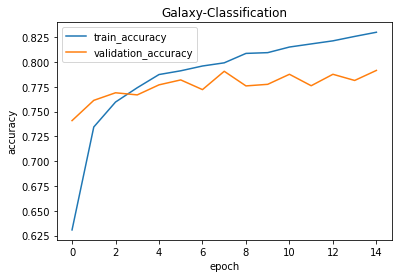

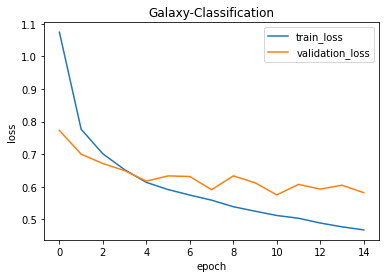

In [ ]:
plot_accuracy(history,'Galaxy-Classification')
plot_loss(history,'Galaxy-Classification')

In [ ]:
#model1 = load_model('/content/drive/MyDrive/Final Year Project/Galaxy Classification/galaxy_class_model.hdf5')

In [ ]:
x, y = zip(*(validation_generator[i] for i in range(len(validation_generator))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print("Accuracy: " ,acc)
print("Loss: ", loss)

177/177 [==============================] - 33s 80ms/step - loss: 0.5973 - accuracy: 0.7960
Accuracy:  0.7959581613540649
Loss:  0.5973069667816162


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#model.save('/content/galaxy_class_model_new.hdf5')

In [ ]:
#model = load_model('/content/drive/MyDrive/Final Year Project/Galaxy Classification/galaxy_class_model_new.hdf5')

In [ ]:
Y_pred = model.predict(validation_generator, validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['completely_round',
'in_between',
'cigar_shaped',
'on_edge',
'spiral_barred',
'spiral',
'Early type',
'Artifact']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # all_labels: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
validation_generator.reset() # resetting generator
y_pred = model.predict(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(validation_generator.classes, y_pred)